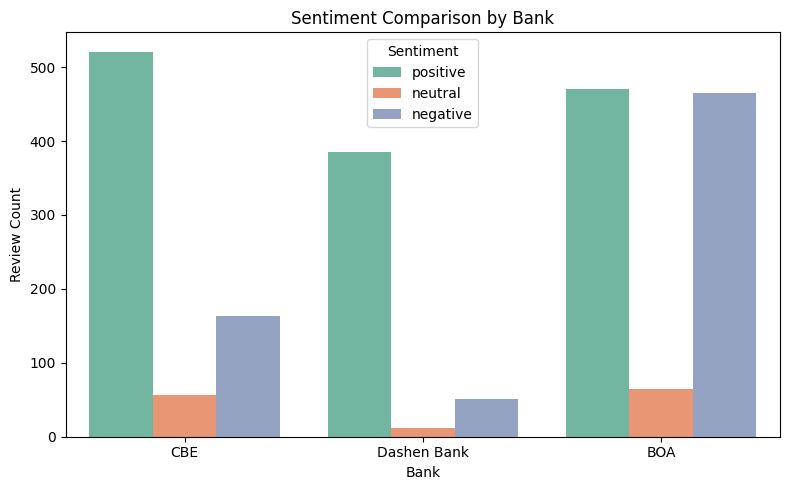

C:\Users\Mesfin\AppData\Local\Temp\ipykernel_15332\2858141298.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_df, x="bank", y="rating", palette="Set3")


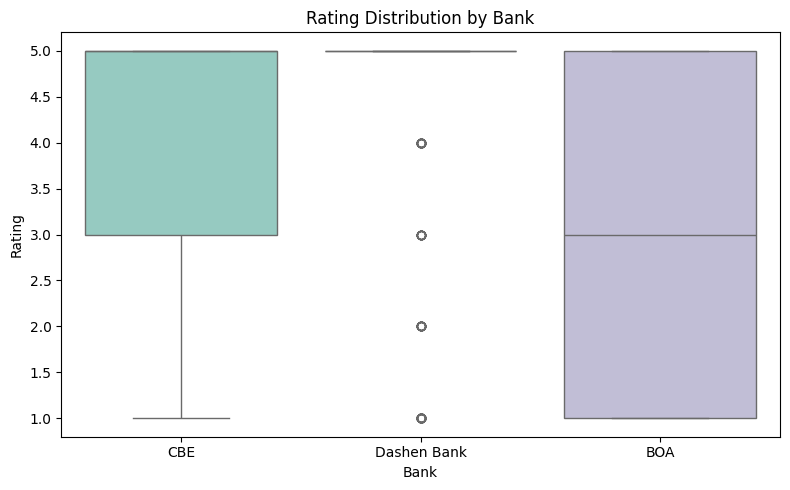


📌 Top Drivers for CBE
       Keyword  Count
0          app    175
1         good     93
2         best     62
3          cbe     44
4         nice     37
5          use     34
6         bank     32
7  application     28
8         easy     28
9         like     25

⚠️ Top Pain Points for CBE
       Keyword  Count
0          app     70
1       update     25
2    developer     23
3         need     20
4         bank     18
5  transaction     17
6   screenshot     16
7          use     15
8       option     15
9      account     13

📌 Top Drivers for Dashen
   Keyword  Count
0      app    198
1   dashen     97
2     bank     70
3    super     70
4  banking     69
5      one     57
6     best     55
7     good     44
8     fast     42
9  feature     40

⚠️ Top Pain Points for Dashen
       Keyword  Count
0          app     21
1  transaction      9
2         good      7
3         bank      7
4         slow      7
5      working      7
6         work      7
7         need      6
8         ev

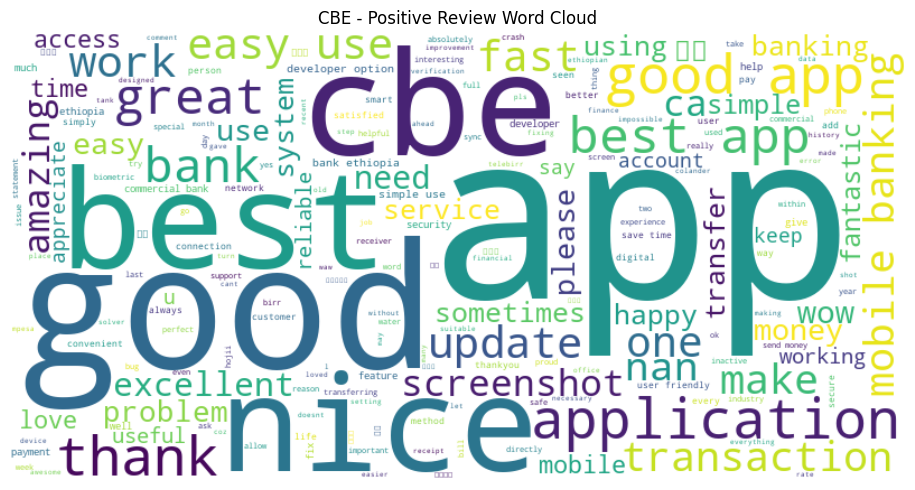

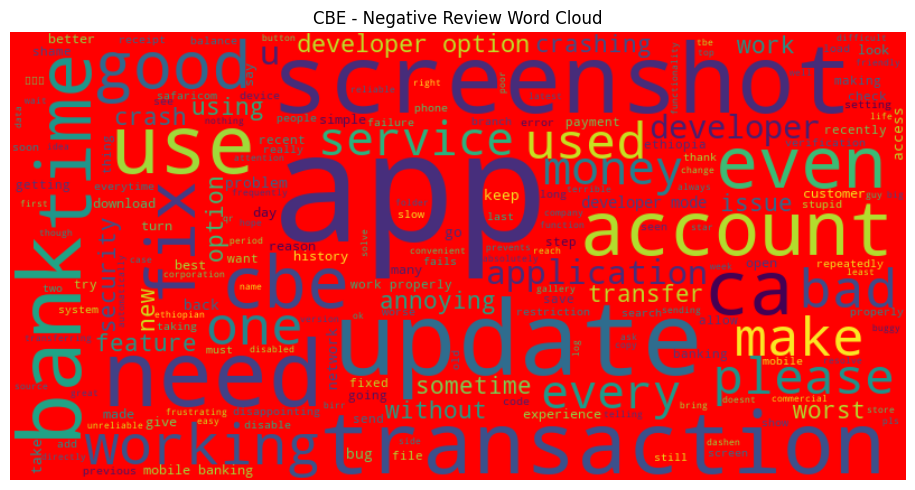

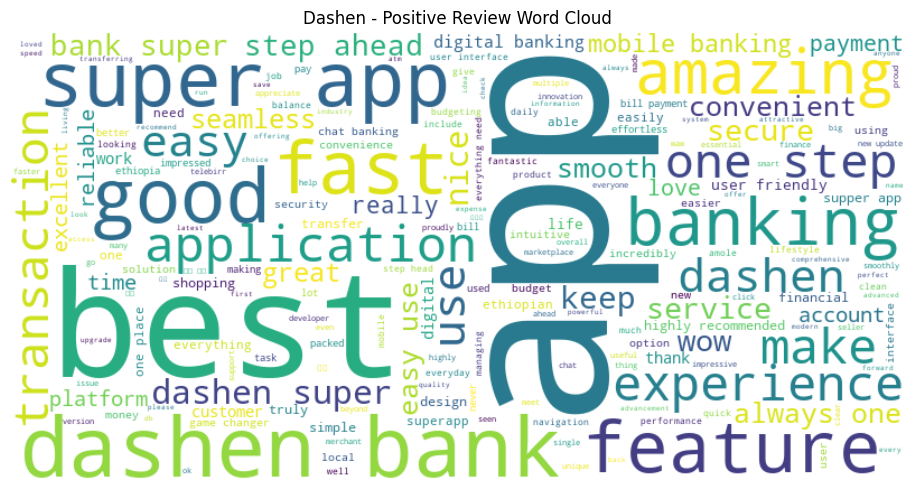

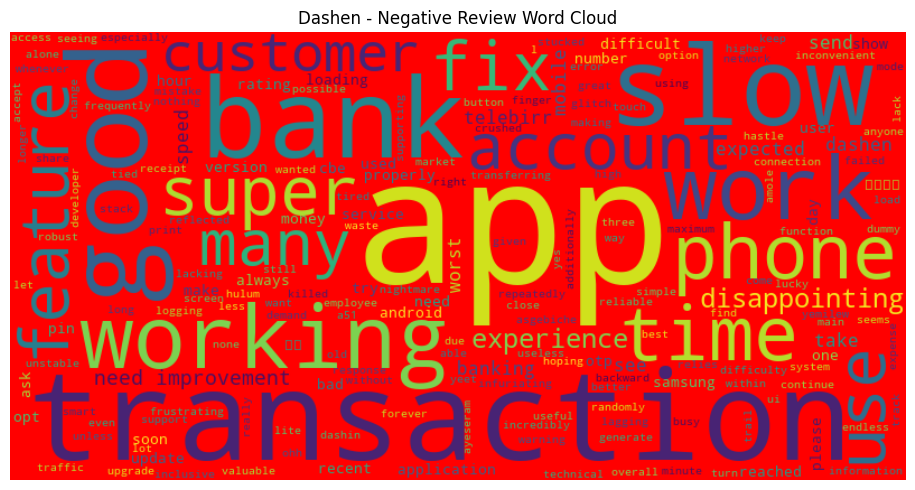

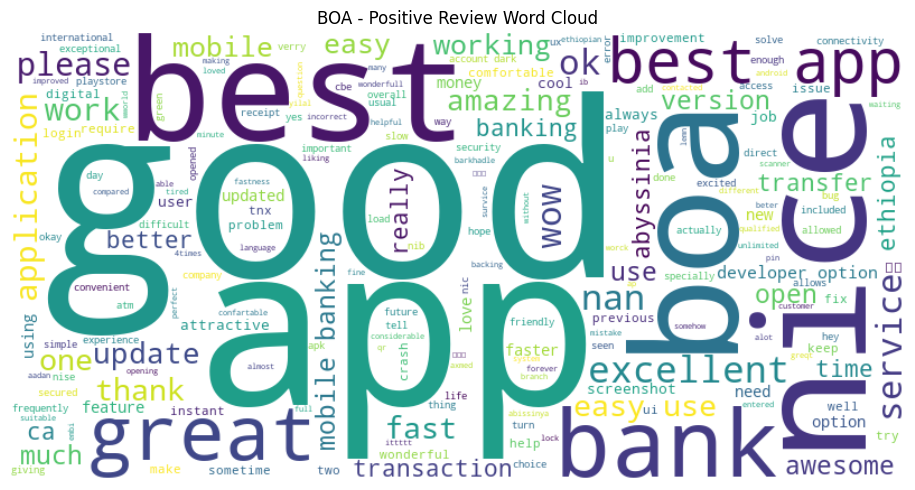

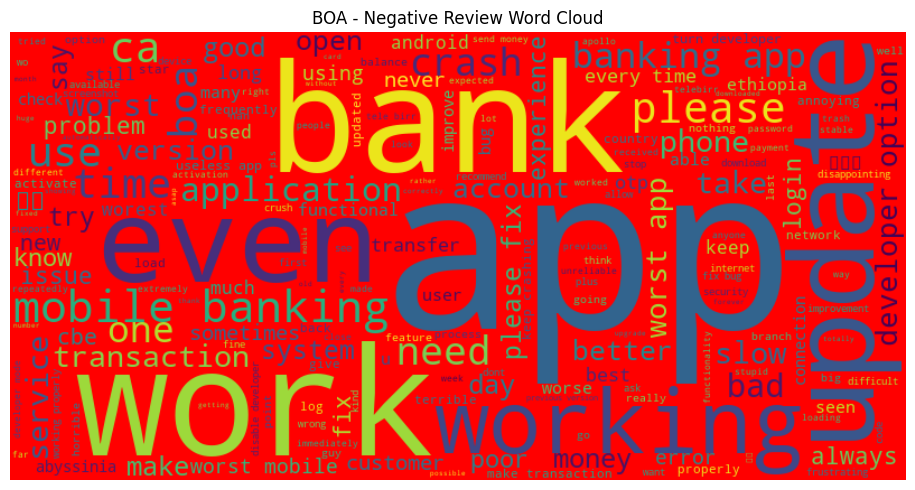

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load your processed datasets
cbe_df = pd.read_csv("../data/processed_cbe_bank_reviews.csv")
dashen_df = pd.read_csv("../data/processed_dashen_bank_reviews.csv")
boa_df = pd.read_csv("../data/processed_boa_bank_reviews.csv")

# Assign bank name (if not already present)
cbe_df["bank"] = "CBE"
dashen_df["bank"] = "Dashen Bank"
boa_df["bank"] = "BOA"

# Combine all for comparison plots
all_df = pd.concat([cbe_df, dashen_df, boa_df], ignore_index=True)

# -------------------------------
# 1. Sentiment Comparison by Bank
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=all_df, x="bank", hue="label", palette="Set2")
plt.title("Sentiment Comparison by Bank")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.savefig("sentiment_comparison_by_bank.png")
plt.show()

# -------------------------------
# 2. Rating Distribution per Bank
# -------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=all_df, x="bank", y="rating", palette="Set3")
plt.title("Rating Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("rating_distribution_by_bank.png")
plt.show()

# -------------------------------
# 3. Function to Get Top Keywords
# -------------------------------
def extract_keywords(df, label, top_n=10):
    text = " ".join(df[df['label'] == label]["processed_review"].astype(str))
    words = text.split()
    most_common = Counter(words).most_common(top_n)
    return pd.DataFrame(most_common, columns=["Keyword", "Count"])

# -------------------------------
# 4. Driver & Pain Point Extraction per Bank
# -------------------------------
for bank_df, name in zip([cbe_df, dashen_df, boa_df], ["CBE", "Dashen", "BOA"]):
    print(f"\n📌 Top Drivers for {name}")
    print(extract_keywords(bank_df, "positive"))

    print(f"\n⚠️ Top Pain Points for {name}")
    print(extract_keywords(bank_df, "negative"))

# -------------------------------
# 5. Word Clouds per Bank and Sentiment
# -------------------------------
def generate_wordcloud(text, title, filename, background_color):
    wordcloud = WordCloud(width=800, height=400, background_color=background_color).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

for df, name in zip([cbe_df, dashen_df, boa_df], ["CBE", "Dashen", "BOA"]):
    for label in ["positive", "negative"]:
        text = " ".join(df[df["label"] == label]["processed_review"].astype(str))
        filename = f"{name.lower()}_{label}_wordcloud.png"
        title = f"{name} - {label.capitalize()} Review Word Cloud"
        background_color = "white" if label == "positive" else "red"
        generate_wordcloud(text, title, filename, background_color)


<Figure size 1200x600 with 0 Axes>

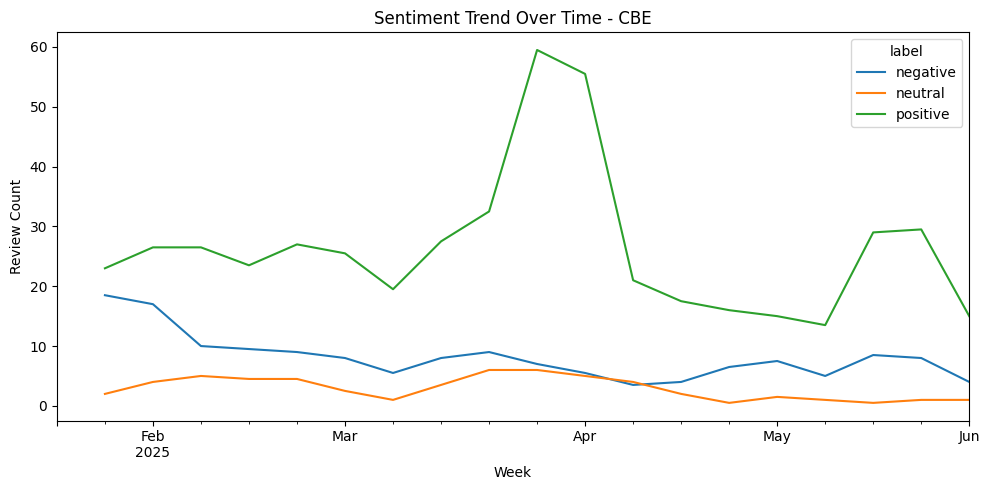

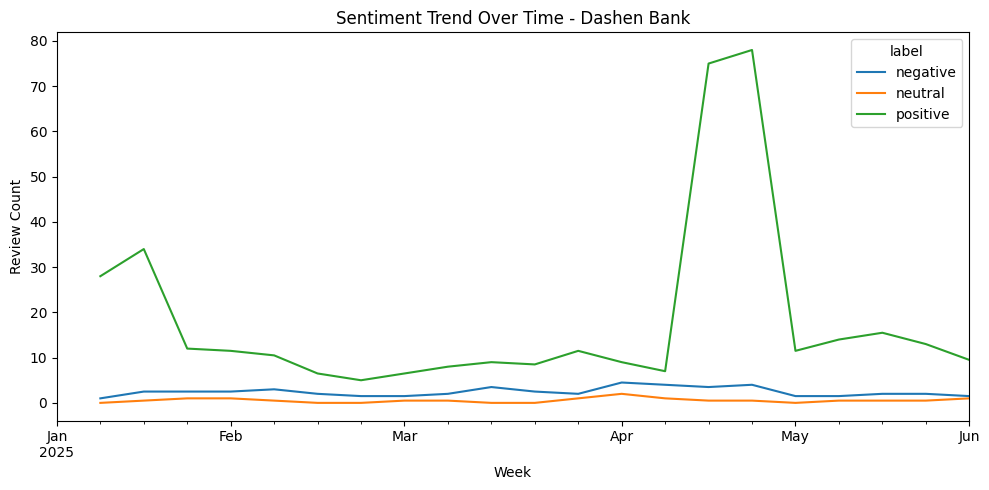

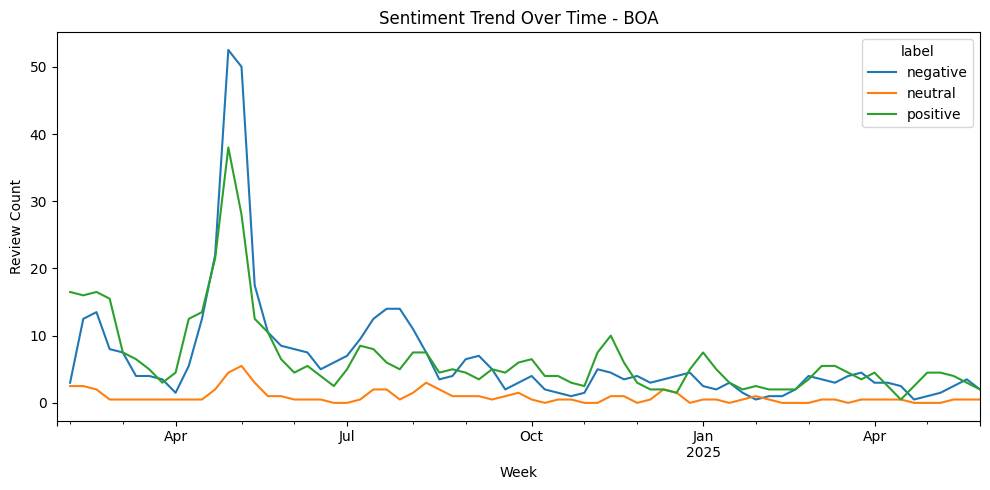

In [4]:
# Ensure date column is datetime
all_df["date"] = pd.to_datetime(all_df["date"])

# Optional: resample by week for smoother trends
all_df['week'] = all_df['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Plot sentiment trends per bank
plt.figure(figsize=(12, 6))

for bank in all_df["bank"].unique():
    bank_data = all_df[all_df["bank"] == bank]
    trend = bank_data.groupby(["week", "label"]).size().unstack(fill_value=0)
    trend = trend.rolling(2).mean()  # Smooth it a bit

    trend.plot(title=f"Sentiment Trend Over Time - {bank}", figsize=(10,5))
    plt.xlabel("Week")
    plt.ylabel("Review Count")
    plt.tight_layout()
    plt.savefig(f"{bank.lower().replace(' ', '_')}_sentiment_trend.png")
    plt.show()
